In [57]:
#---------------------------------Importing Datasets---------------------------------------------------------------

In [58]:
import pandas as pd

In [59]:
test_set_features = pd.read_csv("dengue_features_test.csv")
train_set_features = pd.read_csv("dengue_features_train.csv")
train_set_labels = pd.read_csv("dengue_labels_train.csv")

In [60]:
train_set_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [61]:
train_set_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [62]:
#--------------------------------------Calculating NaN for Each Attribute------------------------------------------

In [63]:
NaN_attributes_train = train_set_features.isnull().sum()

In [64]:
NaN_attributes_train

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [65]:
NaN_attributes_test = test_set_features.isnull().sum()

In [66]:
NaN_attributes_test

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [67]:
#-------------------------Removing Highest NaN Attributes from Train / Test sets-----------------------------------

In [68]:
train_set_features = train_set_features.drop(['ndvi_ne', 'ndvi_nw', 'station_avg_temp_c', 'station_diur_temp_rng_c']
                                            , axis=1)
test_set_features = test_set_features.drop(['ndvi_ne', 'ndvi_nw', 'station_avg_temp_c', 'station_diur_temp_rng_c'],
                                          axis=1)

In [69]:
#------------------------Infusing missing values for remaining attributes------------------------------------------

In [70]:
train_set_features.fillna(method='ffill', inplace=True)
test_set_features.fillna(method='ffill', inplace=True)

In [71]:
#------------------------Seperating Two Cities to create seperate Models-------------------------------------------

In [72]:
sj_train_set_features = train_set_features[train_set_features['city']=='sj']
iq_train_set_features = train_set_features[train_set_features['city']=='iq']
sj_test_set_features = test_set_features[test_set_features['city']=='sj']
iq_test_set_features = test_set_features[test_set_features['city']=='iq']

In [73]:
sj_train_labels = train_set_labels[train_set_labels['city']=='sj']
iq_train_labels = train_set_labels[train_set_labels['city']=='iq']

In [74]:
print('San Juan')
print('mean: ', sj_train_labels['total_cases'].mean())
print('var :', sj_train_labels['total_cases'].var())

print('\nIquitos')
print('mean: ', iq_train_labels['total_cases'].mean())
print('var :', iq_train_labels['total_cases'].var())

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.89552393656412


In [75]:
#----------------------------Appending total cases to features set-------------------------------------------------

In [76]:
sj_train_set_features['total_cases'] = sj_train_labels['total_cases']
iq_train_set_features['total_cases'] = iq_train_labels['total_cases']

/home/kusal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kusal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
sj_train_set_features.head()

,city,year,weekofyear,week_start_date,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,35.0,23.9,5.8,6


In [78]:
iq_train_set_features.head()

,city,year,weekofyear,week_start_date,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,33.3,19.1,4.0,0


In [79]:
#---------------------------------Correlation in SJ Attributes-----------------------------------------------------

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'San Juan Attribute Correlations')

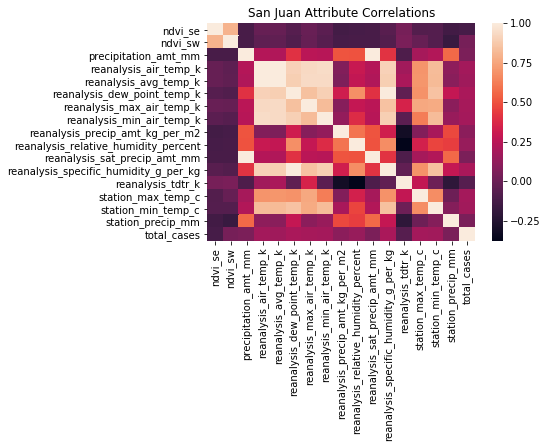

In [81]:
sj_correlations = sj_train_set_features.iloc[:,4:].corr()
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Attribute Correlations')

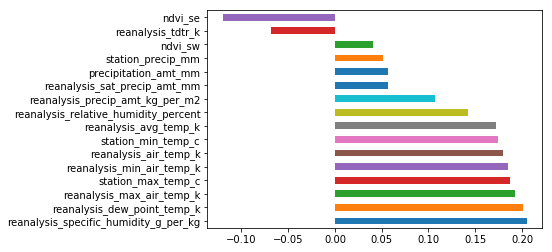

In [82]:
(sj_correlations
     .total_cases
     .drop('total_cases') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [83]:
#------------------------------Feature selection for SJ with RFE---------------------------------------------------

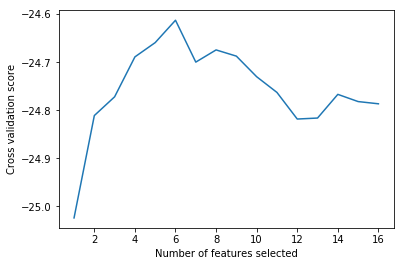

In [84]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, make_scorer

X = sj_train_set_features.iloc[:, 4:20]
y = sj_train_set_features.iloc[:, 20]
estimator = SVR(kernel="linear")
mae = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rfecv = RFECV(estimator, step=1, cv=KFold(5),
              scoring=mae)
rfecv = rfecv.fit(X, y)
rfecv.ranking_

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [85]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


In [86]:
rfecv.ranking_

array([ 3,  6, 11,  4,  1,  1,  1,  1,  8,  5, 10,  1,  1,  7,  2,  9])

In [87]:
attr = pd.DataFrame(X.columns, rfecv.ranking_)

In [88]:
attr

,0
3,ndvi_se
6,ndvi_sw
11,precipitation_amt_mm
4,reanalysis_air_temp_k
1,reanalysis_avg_temp_k
1,reanalysis_dew_point_temp_k
1,reanalysis_max_air_temp_k
1,reanalysis_min_air_temp_k
8,reanalysis_precip_amt_kg_per_m2
5,reanalysis_relative_humidity_percent


In [89]:
#------------------------------------Selected Features for SJ------------------------------------------------------

In [90]:
features = [ 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg', 
'reanalysis_tdtr_k','total_cases']

In [91]:
sj_train_set_features = sj_train_set_features[features]

In [92]:
sj_train_set_features.head()

,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,total_cases
0,297.742857,292.414286,299.8,295.9,14.012857,2.628571,4
1,298.442857,293.951429,300.9,296.4,15.372857,2.371429,5
2,298.878571,295.434286,300.5,297.3,16.848571,2.300000,4
3,299.228571,295.310000,301.4,297.0,16.672857,2.428571,3
4,299.664286,295.821429,301.9,297.5,17.210000,3.014286,6


In [93]:
features_test = ['reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg', 
'reanalysis_tdtr_k']

In [94]:
sj_test_set_features_original = sj_test_set_features
sj_test_set_features = sj_test_set_features[features_test]

In [95]:
sj_test_set_features.head()

,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k
0,298.550000,294.527143,301.1,296.4,15.918571,3.128571
1,298.557143,294.395714,300.8,296.7,15.791429,2.571429
2,299.357143,295.308571,302.2,296.4,16.674286,4.428571
3,299.728571,294.402857,303.0,296.9,15.775714,4.342857
4,299.671429,294.760000,302.3,297.3,16.137143,3.542857


In [96]:
#----------------------------------------Fitting to Models------------------------------------------------------

In [97]:
X_train = sj_train_set_features.iloc[:, 0:6].values
y_train = sj_train_set_features.iloc[:, 5:6].values

In [98]:
X_test = sj_test_set_features.iloc[:].values

In [99]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
regressor = SVR()

kernel = ['rbf', 'linear']
epsilon = [0.1, 0.01, 0.001]
c = range(100, 500, 100)

param_grid = dict(kernel=kernel, C=c, epsilon=epsilon)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(regressor, param_grid, 
                           scoring=mae, 
                           n_jobs=-1, cv=kfold)
grid_result_svr = grid_search.fit(X=X_train, y=y_train)

/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kusal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [47]:
print("Best: Mean: %f, Std: %f using %s" % (grid_result.best_score_,
                                 grid_result.cv_results_['std_test_score'][grid_result.best_index_],
                                 grid_result.best_params_))

Best: Mean: -0.003798, Std: 0.000623 using {'C': 100, 'epsilon': 0.001, 'kernel': 'rbf'}


In [48]:
#--------------------------------------Fitting to XGBoost Method---------------------------------------------------

In [49]:
from xgboost import XGBRegressor

In [50]:
xgb_regressor = XGBRegressor()

n_estimators = range(50, 500, 50)
max_depth = range(1, 16, 2)

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(xgb_regressor, param_grid, 
                           scoring="neg_mean_absolute_error", 
                           n_jobs=-1, cv=kfold)
grid_result_xgb = grid_search.fit(X=X_train, y=y_train)

In [51]:
print("Best: Mean: %f, Std: %f using %s" % (grid_result_xgb.best_score_,
                                 grid_result_xgb.cv_results_['std_test_score'][grid_result_xgb.best_index_],
                                 grid_result_xgb.best_params_))

Best: Mean: -0.003333, Std: 0.000892 using {'max_depth': 11, 'n_estimators': 450}


In [52]:
y_pred = [int(i) for i in y_pred]

In [53]:
city = sj_test_set_features_original["city"]
year = sj_test_set_features_original["year"]
weekofyear = sj_test_set_features_original["weekofyear"]
total_cases = y_pred

In [54]:
res_file = pd.DataFrame()
res_file["city"] = city
res_file["year"] = year
res_file["weekofyear"] = weekofyear
res_file["total_cases"] = y_pred

res_file.to_csv("sj_run.csv", index=False)

In [55]:
iq_csv = pd.read_csv("iq_run.csv")
sj_csv = pd.read_csv("sj_run.csv")
final = pd.concat((sj_csv, iq_csv))

In [56]:
final

,city,year,weekofyear,total_cases
0,sj,2008,18,3
1,sj,2008,19,2
2,sj,2008,20,4
3,sj,2008,21,4
4,sj,2008,22,3
5,sj,2008,23,2
6,sj,2008,24,3
7,sj,2008,25,3
8,sj,2008,26,2
9,sj,2008,27,2
